In [497]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [498]:
import pandas as pd

In [499]:
data = pd.read_csv('/content/drive/MyDrive/ML learning/EDA - EDA.csv.csv')

In [500]:
print(data)

                Crop  Crop_Year      Season              State      Area  \
0           Arecanut       1997  Whole Year              Assam   73814.0   
1          Arhar/Tur       1997      Kharif              Assam    6637.0   
2        Castor seed       1997      Kharif              Assam     796.0   
3            Coconut       1997  Whole Year              Assam   19656.0   
4       Cotton(lint)       1997      Kharif              Assam    1739.0   
...              ...        ...         ...                ...       ...   
19684  Small millets       1998      Kharif           Nagaland    4000.0   
19685          Wheat       1998        Rabi           Nagaland    1000.0   
19686          Maize       1997      Kharif  Jammu and Kashmir  310883.0   
19687           Rice       1997      Kharif  Jammu and Kashmir  275746.0   
19688          Wheat       1997        Rabi  Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  
0           5

In [501]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None


In [502]:
print(data.isnull().sum())

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [503]:
print("Duplicate rows:",data.duplicated().sum())

Duplicate rows: 0


In [504]:
print(data.describe())

          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.000385e+07  2.004170e+04    

In [505]:
print(data.describe(include=[object]))


         Crop  Season      State
count   19689   19689      19689
unique     55       6         30
top      Rice  Kharif  Karnataka
freq     1197    8232       1432


In [506]:
print("Unique values in each column:")
for col in data.columns:
    print(col, ":", data[col].nunique())

Unique values in each column:
Crop : 55
Crop_Year : 24
Season : 6
State : 30
Area : 13644
Production : 14016
Annual_Rainfall : 634
Fertilizer : 18598
Pesticide : 17405
Yield : 13551


In [507]:
for col in data.columns:
    print("Value counts for ")
    print(data[col].value_counts())
    print("--------------------------------------------------")


Value counts for 
Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato     

In [508]:
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    print(col ,":", outliers ,"outliers")


Crop_Year : 0 outliers
Area : 3076 outliers
Production : 3373 outliers
Annual_Rainfall : 1527 outliers
Fertilizer : 3093 outliers
Pesticide : 3036 outliers
Yield : 3065 outliers


In [509]:
print(data.select_dtypes(include=np.number).skew())


Crop_Year          -0.162656
Area               21.858218
Production         19.299193
Annual_Rainfall     2.131785
Fertilizer         13.412599
Pesticide          25.635746
Yield              12.785265
dtype: float64


In [510]:

data["Area"] = np.log1p(data["Area"])
data["Production"] = np.log1p(data["Production"])
data["Annual_Rainfall"] = np.log1p(data["Annual_Rainfall"])
data["Fertilizer"] = np.log1p(data["Fertilizer"])
data["Yield"] = np.log1p(data["Yield"])


In [511]:
print(data.select_dtypes(include=np.number).skew())


Crop_Year          -0.162656
Area               -0.340852
Production          0.003418
Annual_Rainfall     0.077752
Fertilizer         -0.383779
Pesticide          25.635746
Yield               3.660985
dtype: float64


In [512]:
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    print(col ,":", outliers ,"outliers")


Crop_Year : 0 outliers
Area : 183 outliers
Production : 277 outliers
Annual_Rainfall : 942 outliers
Fertilizer : 245 outliers
Pesticide : 3036 outliers
Yield : 1979 outliers


In [513]:
print("Correlation matrix:")
print(data.corr(numeric_only=True))

Correlation matrix:
                 Crop_Year      Area  Production  Annual_Rainfall  Fertilizer  \
Crop_Year         1.000000 -0.106848   -0.066105         0.018743   -0.045523   
Area             -0.106848  1.000000    0.894875        -0.223101    0.997521   
Production       -0.066105  0.894875    1.000000        -0.169127    0.894139   
Annual_Rainfall   0.018743 -0.223101   -0.169127         1.000000   -0.221696   
Fertilizer       -0.045523  0.997521    0.894139        -0.221696    1.000000   
Pesticide        -0.004657  0.386840    0.348997        -0.104224    0.385203   
Yield             0.040259  0.079827    0.491945         0.027411    0.081917   

                 Pesticide     Yield  
Crop_Year        -0.004657  0.040259  
Area              0.386840  0.079827  
Production        0.348997  0.491945  
Annual_Rainfall  -0.104224  0.027411  
Fertilizer        0.385203  0.081917  
Pesticide         1.000000  0.022534  
Yield             0.022534  1.000000  


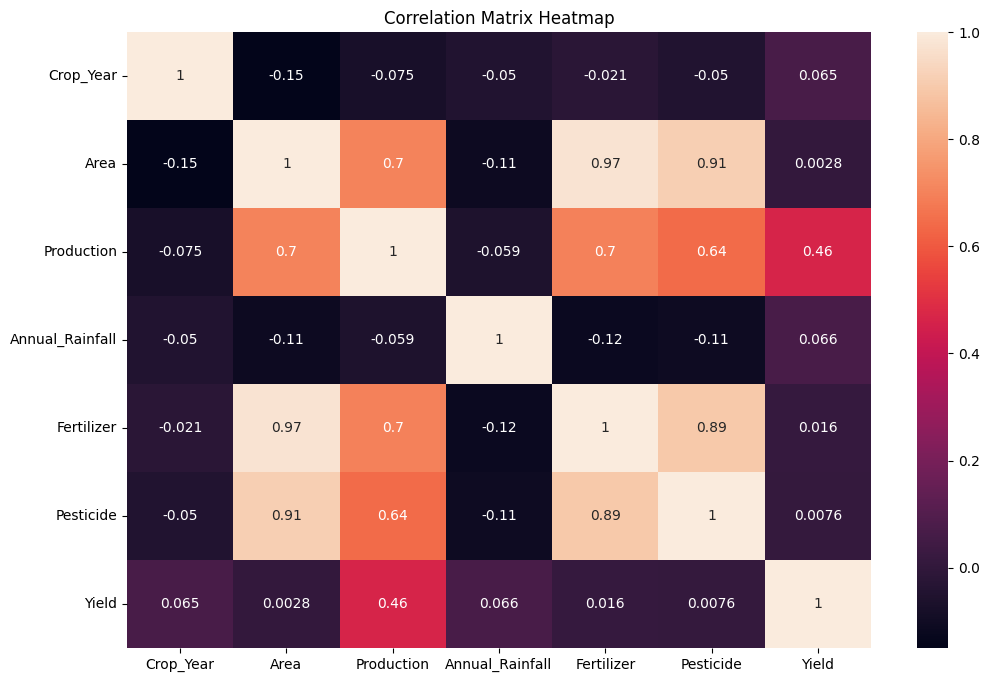

In [514]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [515]:
data = data.drop(columns=["Pesticide"])
print("Pesticide column removed.")


Pesticide column removed.


In [516]:
print(data[data['Annual_Rainfall'] < 0])


Empty DataFrame
Columns: [Crop, Crop_Year, Season, State, Area, Production, Annual_Rainfall, Fertilizer, Yield]
Index: []


In [517]:
print(data[data['Area'] <= 0])

Empty DataFrame
Columns: [Crop, Crop_Year, Season, State, Area, Production, Annual_Rainfall, Fertilizer, Yield]
Index: []


In [518]:
print(data[data['Fertilizer'] == 0])


Empty DataFrame
Columns: [Crop, Crop_Year, Season, State, Area, Production, Annual_Rainfall, Fertilizer, Yield]
Index: []


In [519]:
print(data.groupby('Season')['Crop'].unique())


Season
Autumn        [Rice, Ragi, Dry chillies, Sannhamp, Sesamum, ...
Kharif        [Arhar/Tur, Castor seed, Cotton(lint), Jute, M...
Rabi          [Gram, Linseed, Other  Rabi pulses, Rapeseed &...
Summer        [Rice, Bajra, Jowar, Maize, Ragi, Moong(Green ...
Whole Year    [Arecanut, Coconut, Dry chillies, Niger seed, ...
Winter        [Rice, Potato, Sesamum, Arhar/Tur, Groundnut, ...
Name: Crop, dtype: object


In [520]:
print(data['Crop_Year'].value_counts().sort_index())


Crop_Year
1997     410
1998     646
1999     650
2000     772
2001     750
2002     815
2003     801
2004     787
2005     811
2006     823
2007     828
2008     847
2009     865
2010     859
2011     907
2012     894
2013     976
2014     965
2015     998
2016    1036
2017    1070
2018    1063
2019    1079
2020      37
Name: count, dtype: int64


In [521]:
print(data.groupby('State')['Crop'].value_counts().groupby("State").head(1))


State              Crop                 
Andhra Pradesh     Groundnut                46
Arunachal Pradesh  Maize                    23
Assam              Rice                     69
Bihar              Maize                    69
Chhattisgarh       Moong(Green Gram)        42
Delhi              Bajra                    22
Goa                Groundnut                42
Gujarat            Bajra                    46
Haryana            Peas & beans (Pulses)    29
Himachal Pradesh   Potato                   34
Jammu and Kashmir  Barley                   35
Jharkhand          Rice                     31
Karnataka          Jowar                    69
Kerala             Rice                     66
Madhya Pradesh     Jowar                    40
Maharashtra        Maize                    68
Manipur            Maize                    33
Meghalaya          Rice                     57
Mizoram            Rice                     48
Nagaland           Rice                     41
Odisha             

In [522]:
crop_counts = data['Crop'].value_counts()
rare_crops = crop_counts[crop_counts < 50].index
print("Rare crops:", list(rare_crops))

Rare crops: ['Oilseeds total', 'Other Summer Pulses']
